In [1]:
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import gc
gc.collect()

0

In [2]:
import time
# load the stored rgb-vec dataframe
tok_corp_df = pd.read_csv('/content/drive/My Drive/Word2Vec/rgb-vecs/rgb-vec-0.csv')
for i in tqdm_notebook(range(1, 11)):
    temp_df = pd.read_csv('/content/drive/My Drive/Word2Vec/rgb-vecs/rgb-vec-' + str(i) + '.csv')
    tok_corp_df = pd.concat([tok_corp_df, temp_df])
    # time.sleep(600)
print(tok_corp_df.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



(5656152, 9)


In [3]:
tok_corp_df.head()

,Unnamed: 0,Unnamed: 0.1,word,x,y,z,r,g,b
0,1,1,purchased,-3.233436,-2.716032,-3.202593,10.0,16.0,10.0
1,2,2,this,0.945580,-2.704733,-1.545107,184.0,16.0,45.0
2,3,3,item,-2.688989,0.083493,2.468808,16.0,133.0,235.0
3,4,4,about,-0.155559,-0.743430,1.448126,118.0,82.0,206.0
4,5,5,3,0.897639,-0.818936,1.497294,181.0,78.0,208.0


In [4]:
tok_corp_df.tail()

,Unnamed: 0,Unnamed: 0.1,word,x,y,z,r,g,b
565612,565672,5656738,cos'ly,0.001898,0.029749,-0.010872,128.0,129.0,127.0
565613,565673,5656739,pillahs,0.041324,0.043603,0.034643,130.0,130.0,130.0
565614,0,5656740,da'kness,0.032065,0.006600,0.065293,130.0,128.0,132.0
0,1,5656741,covahd,0.020413,-0.006170,-0.039040,129.0,127.0,125.0
1,2,5656742,cedah,0.057976,-0.000658,-0.004837,131.0,127.0,127.0


In [5]:
king_df = tok_corp_df[tok_corp_df['word'] == 'king'].iloc[0] # load the row  corresponding to the word 'king'
print(king_df)
print('\n\n')
prince_df = tok_corp_df[tok_corp_df['word'] == 'prince'].iloc[0]
print(prince_df, '\n\n')
love_df = tok_corp_df[tok_corp_df['word'] == 'love'].iloc[0]


Unnamed: 0          9022
Unnamed: 0.1        9022
word                king
x               -2.75621
y               0.938623
z               0.300909
r                     15
g                    183
b                    147
Name: 9017, dtype: object



Unnamed: 0          6276
Unnamed: 0.1        6276
word              prince
x               -1.98914
y                1.88587
z              -0.802088
r                     31
g                    221
b                     79
Name: 6272, dtype: object 




In [6]:
man_df = tok_corp_df[tok_corp_df['word'] == 'man'].iloc[0]
man_df

Unnamed: 0          8870
Unnamed: 0.1        8870
word                 man
x              -0.709711
y                3.34375
z               0.287906
r                     84
g                    246
b                    146
Name: 8865, dtype: object

In [7]:
woman_df = tok_corp_df[tok_corp_df['word'] == 'woman'].iloc[0]
woman_df

Unnamed: 0           8643
Unnamed: 0.1         8643
word                woman
x                -2.25246
y                  3.3135
z               0.0744305
r                      24
g                     246
b                     132
Name: 8638, dtype: object

In [8]:
queen_df = tok_corp_df[tok_corp_df['word'] == 'queen'].iloc[0]
queen_df

Unnamed: 0         92769
Unnamed: 0.1       92769
word               queen
x               -2.56044
y                 1.3481
z              -0.291534
r                     18
g                    202
b                    109
Name: 92761, dtype: object

In [9]:
royal_df = tok_corp_df[tok_corp_df['word'] == 'royal'].iloc[0]
royal_df

Unnamed: 0         19734
Unnamed: 0.1       19734
word               royal
x               -1.17391
y              -0.704079
z                -3.1812
r                     60
g                     84
b                     10
Name: 19728, dtype: object

In [10]:
female_df = tok_corp_df[tok_corp_df['word'] == 'female'].iloc[0]
female_df

Unnamed: 0         3254
Unnamed: 0.1       3254
word             female
x               1.30514
y               3.25149
z              -1.15267
r                   201
g                   245
b                    61
Name: 3252, dtype: object

In [11]:
king = [king_df['r'], king_df['g'], king_df['b']] # extract only the rgb values from the king_df (new_r, new_g, new_b)

man = [man_df['r'],man_df['g'],man_df['b']]
woman = [woman_df['r'],woman_df['g'],woman_df['b']]
queen = [queen_df['r'],queen_df['g'],queen_df['b']]
royal = [royal_df['r'],royal_df['g'],royal_df['b']]
female = [female_df['r'],female_df['g'],female_df['b']]
print(king)
print(man)
print(woman)
print(queen)
print(royal)

[15.0, 183.0, 147.0]
[84.0, 246.0, 146.0]
[24.0, 246.0, 132.0]
[18.0, 202.0, 109.0]
[60.0, 84.0, 10.0]


In [12]:
cat_df = tok_corp_df[tok_corp_df['word'] == 'cat'].iloc[0]
wild_df = tok_corp_df[tok_corp_df['word'] == 'wild'].iloc[0]
tiger_df = tok_corp_df[tok_corp_df['word'] == 'tiger'].iloc[0]
lion_df = tok_corp_df[tok_corp_df['word'] == 'lion'].iloc[0]
dog_df = tok_corp_df[tok_corp_df['word'] == 'dog'].iloc[0]
wolf_df = tok_corp_df[tok_corp_df['word'] == 'wolf'].iloc[0]
fox_df = tok_corp_df[tok_corp_df['word'] == 'fox'].iloc[0]
holy_df = tok_corp_df[tok_corp_df['word'] == 'holy'].iloc[0]
priest_df =  tok_corp_df[tok_corp_df['word'] == 'priest'].iloc[0]
fermented_df =  tok_corp_df[tok_corp_df['word'] == 'fermented'].iloc[0]
yeast_df =  tok_corp_df[tok_corp_df['word'] == 'yeast'].iloc[0]
malt_df =  tok_corp_df[tok_corp_df['word'] == 'malt'].iloc[0]
beer_df =  tok_corp_df[tok_corp_df['word'] == 'beer'].iloc[0]
liquor_df =  tok_corp_df[tok_corp_df['word'] == 'liquor'].iloc[0]

love = [love_df['r'], love_df['g'], love_df['b']]
wolf = [wolf_df['r'], wolf_df['g'], wolf_df['b']]
fox = [fox_df['r'], fox_df['g'], fox_df['b']]
cat = [cat_df['r'],cat_df['g'],cat_df['b']]
wild = [wild_df['r'],wild_df['g'],wild_df['b']]
tiger = [tiger_df['r'],tiger_df['g'],tiger_df['b']]
lion = [lion_df['r'],lion_df['g'],lion_df['b']]
dog = [dog_df['r'], dog_df['g'], dog_df['b']]
holy = [holy_df['r'], holy_df['g'], holy_df['b']]
priest = [priest_df['r'], priest_df['g'], priest_df['b']]
fermented = [fermented_df['r'], fermented_df['g'], fermented_df['b']]
yeast = [yeast_df['r'], yeast_df['g'], yeast_df['b']]
malt = [malt_df['r'], malt_df['g'], malt_df['b']]
beer = [beer_df['r'], beer_df['g'], beer_df['b']]
liquor = [liquor_df['r'], liquor_df['g'], liquor_df['b']]
prince = [prince_df['r'], prince_df['g'], prince_df['b']]
print(love)

[127.0, 212.0, 219.0]


In [0]:
# r.R = fg.R * fg.A / r.A + bg.R * bg.A * (1 - fg.A) / r.A; this is the formula used below, it is taken from stack overflow and is written in javascript
# a rudimentary color mixing function
def mix(x, y):
    mixed = [0,0,0]
    for i in range(len(mixed)):
        # print(a)
        mixed[i] = x[i]*0.5/0.75 + y[i]*0.5*(1-0.5)/0.75
    return mixed

def round_list(a):
    return [round(i) for i in a]

In [16]:
# import and test the library sty which gives color to the text and also colors its background
!pip install sty
from sty import fg, bg, ef, rs
qui = fg(0, 255, 255) + bg(255, 0, 0) + 'This is red text using 24bit colors.'
print(qui)

This is red text using 24bit colors.


In [17]:
a1 = [255,0,0,0.5]
a2 = [0,255,0,0.5]
x = mix(a2, a1)
print(x)

[85.0, 170.0, 0.0]


For some time you will notice color mixing function called, this is actually a failure which i was unable to tackle, maybe the ratio of colors mixing should be taken into conisderation or maybe consider to combine more words to form a new word, i.e. a king is not just a royal man, he is also the ruler, the most powerful person, also the text to which the model is trained on might have more cruel and lazy kings then noble and royal kings.

In [27]:
print('Obtained = ', mix(royal, man))
print('Expected = ', king)

Obtained =  [68.0, 138.0, 55.33333333333333]
Expected =  [15.0, 183.0, 147.0]


In [28]:
print('Obtained = ', mix(royal, female))
print('Expected = ', queen)

Obtained =  [107.0, 137.66666666666669, 27.0]
Expected =  [18.0, 202.0, 109.0]


In [29]:
print('Obtained = ', mix(wild, cat))
print('Expected = ', tiger)

Obtained =  [221.66666666666669, 214.0, 77.33333333333333]
Expected =  [193.0, 252.0, 74.0]


In [30]:
print('Obtained = ', mix(dog, wild))
print('Expected = ', fox)

Obtained =  [191.66666666666669, 233.0, 105.66666666666666]
Expected =  [232.0, 247.0, 37.0]


In [31]:
print('Obtained = ', mix(holy, man))
print('Expected = ', priest)

Obtained =  [170.66666666666666, 221.33333333333334, 103.33333333333333]
Expected =  [24.0, 251.0, 121.0]


In [32]:
print('Obtained = ', mix(fermented, yeast))
print('Expected = ', beer)

Obtained =  [249.33333333333331, 209.33333333333331, 152.66666666666666]
Expected =  [212.0, 239.0, 123.0]


In [33]:
a = mix(fermented, yeast)
b = mix(a, malt)
print('Obtained = ', b)
print('Expected = ', beer)

Obtained =  [249.55555555555554, 195.55555555555554, 113.44444444444444]
Expected =  [212.0, 239.0, 123.0]


In [34]:
print('Obtained = ', mix(b,liquor))
print('Expected = ', beer)

Obtained =  [246.037037037037, 204.7037037037037, 121.96296296296296]
Expected =  [212.0, 239.0, 123.0]


In [35]:
# import the required library
from gensim.models import Word2Vec
# load the model from the drive
model = Word2Vec.load('/content/drive/My Drive/Word2Vec/combined-model/model.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [36]:
king = model.most_similar('king')
king

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('emperor', 0.9237829446792603),
 ('sultan', 0.9185107946395874),
 ('duke', 0.9152607917785645),
 ('caliph', 0.9096181392669678),
 ('Tsar', 0.906605064868927),
 ('King', 0.8945298194885254),
 ('Khalif', 0.8891754150390625),
 ('prince', 0.8876203298568726),
 ('pope', 0.8860566020011902),
 ('rajah', 0.8787473440170288)]

In [37]:
dog = model.most_similar('dog')
dog

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('cat', 0.948481559753418),
 ('puppy', 0.9433003067970276),
 ('monkey', 0.942652702331543),
 ('goat', 0.9320075511932373),
 ('tiger', 0.9145665764808655),
 ('rooster', 0.9137760400772095),
 ('rabbit', 0.9133926630020142),
 ('fox', 0.912606954574585),
 ('pup', 0.912010908126831),
 ('pig', 0.9114131927490234)]

In [38]:
good = model.most_similar('good')
good

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('bad', 0.8380252122879028),
 ('decent', 0.8280789852142334),
 ('profitable', 0.8030284643173218),
 ('unfit', 0.7714719176292419),
 ('useful', 0.7598644495010376),
 ('best', 0.7529378533363342),
 ('needful', 0.7514627575874329),
 ('trifling', 0.7362024188041687),
 ('foolish', 0.7359263896942139),
 ('nice', 0.7330319881439209)]

In [0]:
# extract function depicts the relation between colors and the model it takes a word and then finds the words most similar to that word and then print all the words 
# with their corresponding rgb value background
def extract (word):
    x = [(word, 0)] # load te word to match the structure of the most_similar output and 0 is just a dummy value not a meaningful one so dont think a lot about it 
    #initialize three empty lists for later storing x, y, z values to plot on a graph
    xdata = []
    zdata = []
    ydata = []
    # find the words similar to the given word and then include all of them and the given word into list
    x = x + model.most_similar(word)
    # iterate over each word and probability
    for group in x:
        temp = tok_corp_df[tok_corp_df['word'] == group[0]] # load the row corresponding to the word  
        temp = [int(temp['r']), int(temp['g']), int(temp['b'])] # keep only the r, g, b values and in that specific order and convert them to int coz colors do not accept floating point values
        # color the background of the word - (r,g,b) and color the word with it's contrast for clear visibility i.e. (255-r, 255-g, 255-b)
        qui = fg(255-temp[0], 255-temp[1], 255-temp[2]) + bg(temp[0], temp[1], temp[2]) + group[0] 
        print(qui) # print the colored words
        print(temp) # print the corresponding rgb value
        
        # append all the x, y, z values to corresponding lists
        xdata.append(temp[0])
        ydata.append(temp[1])
        zdata.append(temp[2])    
    
    # plot a 3-D graph of the points, the 3-D graph is not as useful as 2-D graph because here you are unable to draw conclusions based on seeing the graph
    import matplotlib.pyplot as plt
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(xdata, ydata, zdata, c=zdata)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


king
[15, 183, 147]
emperor
[61, 121, 190]
sultan
[71, 120, 138]
duke
[8, 103, 171]
caliph
[59, 134, 164]
Tsar
[35, 211, 141]
King
[17, 211, 41]
Khalif
[86, 121, 230]
prince
[31, 221, 79]
pope
[52, 164, 243]
rajah
[27, 169, 72]


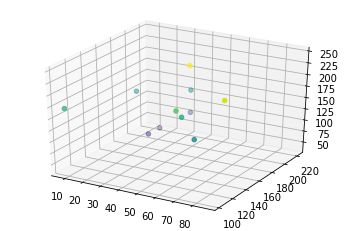

In [41]:
extract('king') 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


dog
[168, 252, 122]
cat
[187, 252, 86]
puppy
[164, 247, 105]
monkey
[221, 253, 122]
goat
[239, 250, 68]
tiger
[193, 252, 74]
rooster
[199, 252, 48]
rabbit
[243, 246, 98]
fox
[232, 247, 37]
pup
[165, 235, 32]
pig
[247, 248, 91]



cat
[187, 252, 86]
monkey
[221, 253, 122]
dog
[168, 252, 122]
puppy
[164, 247, 105]
hen
[247, 253, 117]
toad
[224, 253, 76]
kitten
[164, 250, 146]
mouse
[241, 247, 95]
goat
[239, 250, 68]
parrot
[139, 253, 135]
rabbit
[243, 246, 98]


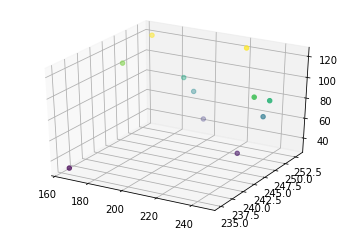

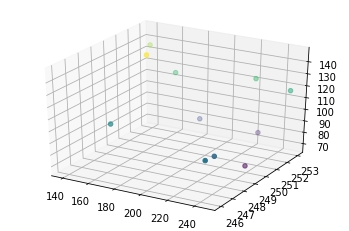

In [44]:
extract('dog')
print('\n\n')
extract('cat')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


good
[246, 69, 22]
bad
[248, 138, 10]
decent
[239, 45, 33]
profitable
[248, 11, 53]
unfit
[254, 36, 80]
useful
[243, 65, 85]
best
[235, 154, 94]
needful
[231, 31, 145]
trifling
[109, 61, 130]
foolish
[227, 196, 114]
nice
[233, 45, 35]


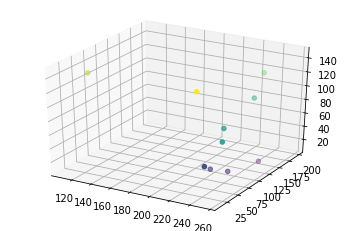

In [45]:
extract('good')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


tree
[241, 197, 177]
shrub
[237, 242, 179]
pod
[249, 244, 233]
nest
[186, 234, 211]
bush
[228, 234, 222]
pear-tree
[179, 228, 97]
gnome-King
[129, 129, 131]
stalk
[239, 227, 216]
birch-tree
[162, 214, 194]
caterpillar
[241, 241, 159]
palm-tree
[201, 240, 159]



shrub
[237, 242, 179]
acacia
[244, 241, 200]
cotton-tree
[174, 185, 153]
beech
[220, 243, 93]
palm-tree
[201, 240, 159]
tree
[241, 197, 177]
poplar
[235, 241, 121]
date-palm
[231, 197, 148]
peach-tree
[172, 181, 129]
fern
[241, 243, 148]
water-lily
[207, 223, 166]


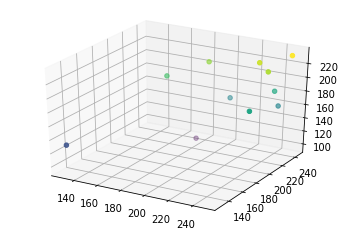

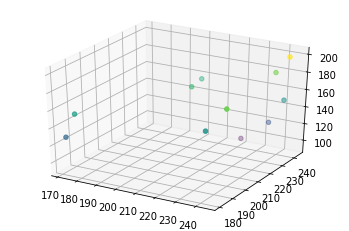

In [46]:
extract('tree')
print('\n\n')
extract('shrub')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


end
[51, 44, 240]
extremity
[36, 146, 241]
length
[6, 23, 235]
quarter
[61, 24, 234]
angle
[13, 148, 254]
circuit
[173, 89, 253]
point
[10, 111, 253]
eighth
[26, 49, 154]
compass
[54, 102, 246]
nick
[98, 66, 70]
disherwasher
[126, 130, 139]



start
[204, 17, 223]
ride
[205, 72, 159]
travel
[240, 10, 192]
walk
[213, 111, 242]
pass
[225, 87, 238]
go
[252, 40, 218]
jump
[208, 171, 238]
shift
[241, 56, 231]
move
[208, 181, 250]
get
[249, 38, 124]
stay
[193, 14, 216]



extract
[149, 90, 244]
Extract
[196, 31, 241]
introduction
[30, 135, 225]
reprint
[37, 37, 230]
appendix
[95, 89, 251]
scrub/mask
[126, 132, 132]
Adapted
[82, 45, 253]
laminating
[133, 197, 233]
aquatint
[106, 155, 156]
print
[108, 105, 187]
re-touched
[146, 106, 147]



middle
[43, 105, 160]
upper
[99, 162, 148]
fourth
[39, 165, 82]
sixth
[18, 155, 81]
ninth
[17, 80, 181]
center
[91, 157, 212]
eighth
[26, 49, 154]
midway
[15, 52, 243]
third
[32, 159, 67]
lowest
[208, 115, 133]
Dun-I
[118, 140, 138]


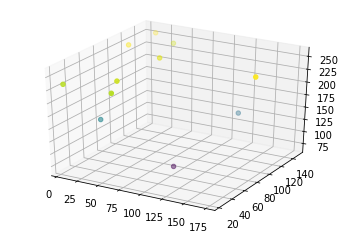

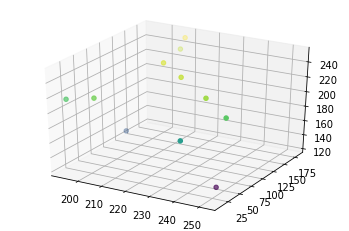

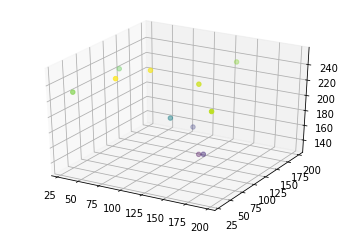

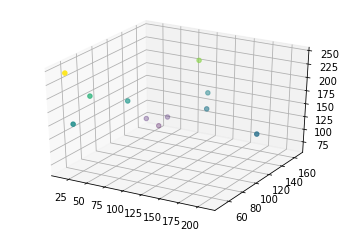

In [47]:
extract('end')
print('\n\n')
extract('start')
print('\n\n')
extract('extract')
print('\n\n')
extract('middle')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Paris
[132, 10, 194]
Vienna
[104, 11, 223]
Leipsic
[81, 8, 211]
Nuremberg
[97, 17, 162]
Mannheim
[107, 16, 221]
Berlin
[195, 21, 197]
Moscow
[134, 18, 174]
Weimar
[47, 11, 202]
Munich
[150, 18, 227]
Prague
[65, 17, 184]
Madrid
[135, 6, 199]


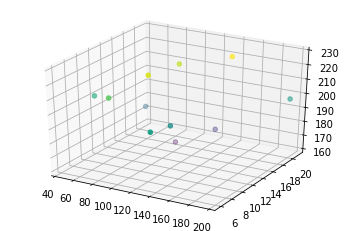

In [48]:
extract('Paris')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


queen
[18, 202, 109]
princess
[35, 167, 146]
bride
[17, 175, 140]
bridegroom
[43, 196, 140]
damsel
[40, 231, 115]
prince
[31, 221, 79]
saint
[55, 241, 95]
king
[15, 183, 147]
Tsar
[35, 211, 141]
mistress
[15, 230, 161]
Princess
[31, 229, 112]


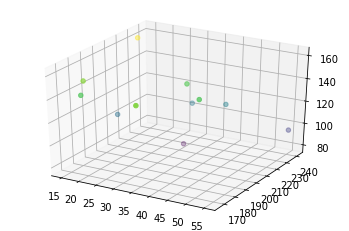

In [49]:
extract('queen')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


man
[84, 246, 146]
woman
[24, 246, 132]
sinner
[137, 178, 158]
creature
[100, 250, 189]
fellow
[53, 241, 90]
girl
[10, 238, 210]
child
[50, 225, 211]
workman
[133, 244, 32]
youngster
[127, 218, 117]
soldier
[57, 229, 32]
boy
[13, 240, 159]


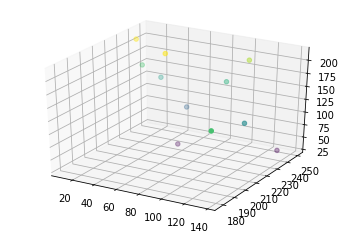

In [50]:
extract('man')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


monster
[73, 245, 160]
beast
[195, 252, 154]
giant
[135, 244, 60]
snake
[179, 252, 165]
dragon
[181, 251, 127]
serpent
[123, 254, 119]
ChimÃ¦ra
[166, 182, 157]
bull
[148, 248, 86]
fiend
[110, 251, 150]
tiger
[193, 252, 74]
spectre
[7, 239, 180]


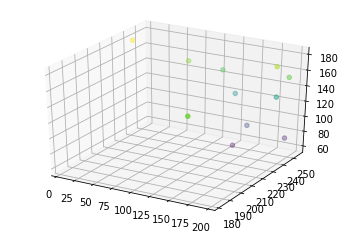

In [51]:
extract('monster')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


note
[5, 225, 252]
remark
[1, 245, 249]
suggestion
[3, 226, 243]
postscript
[1, 180, 250]
sketch
[6, 87, 250]
hint
[16, 193, 250]
description
[9, 209, 244]
scrawl
[5, 246, 252]
statement
[2, 187, 253]
transcript
[6, 148, 251]
wording
[2, 240, 253]


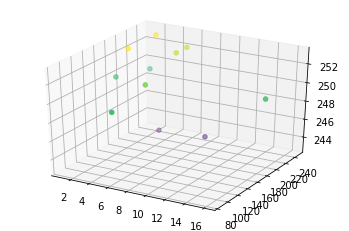

In [53]:
extract('note')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


word
[60, 254, 251]
sentence
[8, 243, 254]
formula
[99, 251, 252]
syllable
[12, 252, 255]
confession
[5, 222, 251]
commandment
[106, 197, 246]
scripture
[99, 249, 253]
precept
[107, 246, 231]
suggestion
[3, 226, 243]
utterance
[10, 240, 252]
pronoun
[28, 255, 254]


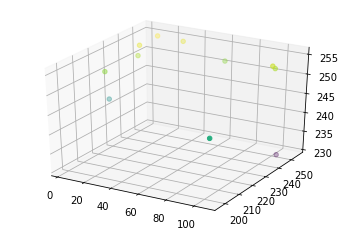

In [54]:
extract('word')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


love
[127, 212, 219]
pity
[29, 185, 222]
praise
[36, 225, 232]
hope
[167, 29, 235]
kindness
[10, 190, 206]
goodness
[48, 199, 187]
bullcityvapor.com
[132, 126, 130]
envy
[120, 240, 197]
affection
[7, 140, 231]
cherish
[221, 107, 152]
happiness
[76, 16, 223]


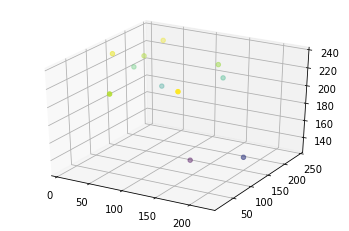

In [55]:
extract('love')

In [0]:
# terminate the notebook
import os
os.kill(os.getpid(), 9)